# Data Exploration/Visualisation and Modelling

The first part will be exploring and visualising the data. I'll look into the relationships between the variables that will be used for modelling. 

### Part 1
### Data Exploration and Visualisation

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing functions needed from py files
from cleaning import full_clean
from main import split_data, linear_regression

%matplotlib inline

In [2]:
# Using function from py file: See cleaning.py for functions used for cleaning
df = full_clean()
df.head(5)

,Unnamed: 0,price,area,rooms,flat,house,new_dev,penthouse
0,0,1675000.0,2716.0,5.0,0,1,0,0
1,1,650000.0,814.0,2.0,1,0,0,0
2,2,735000.0,761.0,2.0,1,0,0,0
3,3,1765000.0,1986.0,4.0,0,1,0,0
4,4,675000.0,700.0,2.0,1,0,0,0


In [3]:
#There is 2972 houses left in the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 3479
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2972 non-null   int64  
 1   price       2972 non-null   float64
 2   area        2972 non-null   float64
 3   rooms       2972 non-null   float64
 4   flat        2972 non-null   uint8  
 5   house       2972 non-null   uint8  
 6   new_dev     2972 non-null   uint8  
 7   penthouse   2972 non-null   uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 127.7 KB


In [4]:
#Checking the correlations between the variables that will be used for modelling
corr = df.corr()
corr

,Unnamed: 0,price,area,rooms,flat,house,new_dev,penthouse
Unnamed: 0,1.000000,0.148249,0.080020,-0.017587,0.067192,-0.116775,0.055392,0.055512
price,0.148249,1.000000,0.758341,0.452313,-0.260532,0.204825,0.060066,0.095589
area,0.080020,0.758341,1.000000,0.789078,-0.474500,0.516561,-0.048327,0.039725
rooms,-0.017587,0.452313,0.789078,1.000000,-0.580753,0.711474,-0.139927,-0.022382
flat,0.067192,-0.260532,-0.474500,-0.580753,1.000000,-0.755651,-0.328792,-0.183312
house,-0.116775,0.204825,0.516561,0.711474,-0.755651,1.000000,-0.249457,-0.139080
new_dev,0.055392,0.060066,-0.048327,-0.139927,-0.328792,-0.249457,1.000000,-0.060515
penthouse,0.055512,0.095589,0.039725,-0.022382,-0.183312,-0.139080,-0.060515,1.000000


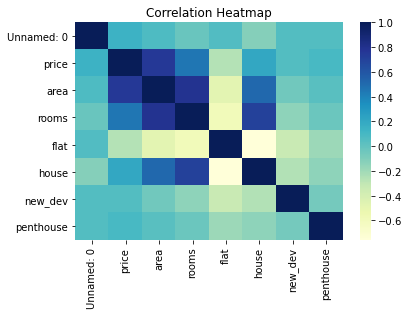

In [5]:
sns.heatmap(corr, cmap="YlGnBu");
plt.title("Correlation Heatmap");

The strongest correlation between features and price is area. Then as expected, area has a strong correlation with number of rooms and house type. 
It looks like there is multicollinearity between area and rooms (0.789078). So both these variables will not be used in the modelling.

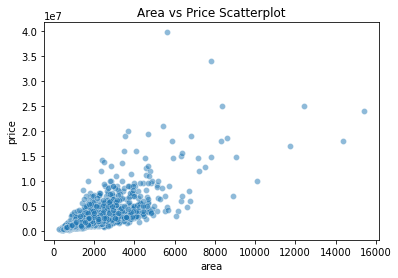

In [6]:
sns.scatterplot(data=df, x = "area", y = "price", alpha = 0.5);
plt.title("Area vs Price Scatterplot");

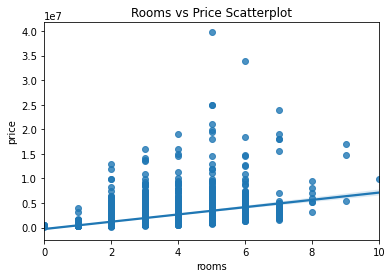

In [7]:
sns.regplot(data=df, x = "rooms", y = "price");
plt.title("Rooms vs Price Scatterplot");

In [8]:
#Data for number of rooms and stats for price
df.groupby(["rooms"])["price"].describe()

,count,mean,std,min,25%,50%,75%,max
rooms,,,,,,,,
0.0,10.0,3.718000e+05,1.105298e+05,210000.0,295000.0,367500.0,450000.0,573000.0
1.0,393.0,6.337233e+05,3.321535e+05,249999.0,450000.0,550000.0,725000.0,3950000.0
2.0,998.0,1.136260e+06,1.050752e+06,180000.0,650000.0,849999.5,1200000.0,12950000.0
3.0,621.0,2.067601e+06,1.909339e+06,399950.0,925000.0,1395000.0,2450000.0,16000000.0
4.0,450.0,2.461119e+06,2.161811e+06,500000.0,1296250.0,1695000.0,2750000.0,18950000.0
5.0,340.0,3.201932e+06,3.759774e+06,795000.0,1668750.0,2150000.0,3000000.0,39750000.0
6.0,116.0,4.382780e+06,4.066925e+06,1250000.0,2450000.0,2970000.0,4800000.0,34000000.0
7.0,33.0,5.805303e+06,5.835882e+06,1550000.0,2700000.0,3500000.0,4950000.0,23950000.0
8.0,7.0,6.292857e+06,2.089144e+06,3100000.0,5250000.0,5950000.0,7500000.0,9500000.0


After exploring the data further and analysing the table above. Number of rooms will not be used in the modelling. The variables that will be used will be area and house type.

### Part 2: Linear Regression: Modelling and Results



Please see main.py for the splitting and modelling functions.

In [27]:
X_train, X_test, y_train, y_test = split_data(df)

In [28]:
linear_reg = linear_regression(X_train, X_test, y_train, y_test)

In [29]:
lr_r2, y_test, y_pred = linear_reg[0],linear_reg[1],linear_reg[2]

In [37]:
print("R2 score: {}".format(lr_r2.round(2)))

R2 score: 0.65


C:\Users\ellio\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


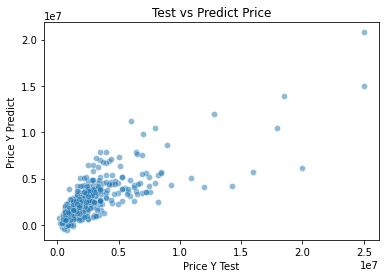

In [35]:
sns.scatterplot(y_test, y_pred, alpha=0.5);
plt.ylabel("Price Y Predict");
plt.xlabel("Price Y Test");
plt.title("Test vs Predict Price");